In [1]:
%matplotlib inline

import pylabs
pylabs.datadir.target = 'jaba'
from pathlib import *
import os
import numpy as np
import pandas as pd
import nibabel as nib
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from pylabs.utils import getnetworkdataroot
fs = Path(getnetworkdataroot())

setting root data directory to jaba.
('found mrjeffs laptop. using local datadir. datadir= ', 'jaba')


In [2]:
os.chdir(str(fs.parent/'scaling_issue'))
os.listdir(os.getcwd())

['sub-acdc103_ses-1_dwi-topup_64dir-3sh-800-2000_1.nii',
 'sub-acdc103_ses-1_fsmempr_ti1400_rms_1.nii',
 'sub-acdc103_ses-1_vfa_fa-4-25-tr-21p0_1.nii',
 'sub-acdc104_ses-1_dwi-topup_64dir-3sh-800-2000_1_selected_vols_topdn_unwarped_ec.nii.gz',
 'sub-acdc104_ses-1_fsmempr_ti1400_rms_1.nii',
 'sub-nbwr144_ses-1_3dt2_1.nii',
 'sub-nbwr144_ses-1_dwi-topup_64dir-3sh-800-2000_1.nii',
 'sub-nbwr144_ses-1_dwi-topup_64dir-3sh-800-2000_1_topdn_unwarped_ec_mf_clamp1.nii.gz',
 'sub-nbwr144_ses-1_fsmempr_ti1100_1.nii',
 'sub-nbwr144_ses-1_fsmempr_ti1100_rms_1.nii',
 'sub-nbwr144_ses-1_spgr_fa-05-tr-12p0_1.nii',
 'sub-nbwr144_ses-1_spgr_fa-30-tr-12p0_1.nii']

In [3]:
nbwr144_mpr_rms = nib.load('sub-nbwr144_ses-1_fsmempr_ti1100_rms_1.nii').get_data()
nbwr144_dwi = nib.load('sub-nbwr144_ses-1_dwi-topup_64dir-3sh-800-2000_1_topdn_unwarped_ec_mf_clamp1.nii.gz').get_data()
nbwr144_fa05 = nib.load('sub-nbwr144_ses-1_spgr_fa-05-tr-12p0_1.nii').get_data()
nbwr144_fa30 = nib.load('sub-nbwr144_ses-1_spgr_fa-30-tr-12p0_1.nii').get_data()

acdc103_mpr_rms = nib.load('sub-acdc103_ses-1_fsmempr_ti1400_rms_1.nii').get_data()
acdc103_dwi = nib.load('sub-acdc103_ses-1_dwi-topup_64dir-3sh-800-2000_1.nii').get_data()
acdc103_vfa = nib.load('sub-acdc103_ses-1_vfa_fa-4-25-tr-21p0_1.nii').get_data()


In [17]:
acdc103_vfa[acdc103_vfa < 1] = np.nan

In [13]:
np.array(acdc103_vfa.shape) / 2

array([145, 192, 192,   2])

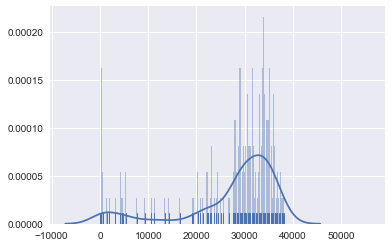

In [27]:
sns.distplot(nbwr144_fa05[:,120,120], bins=256, rug=True, hist_kws={'range': (1, nbwr144_fa05.max())},\
            kde_kws={'clip': (1, nbwr144_fa05.max())})

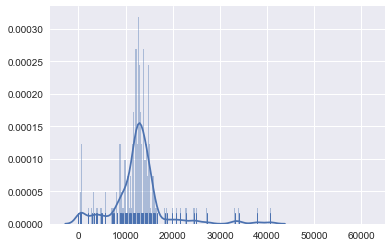

In [21]:
sns.distplot(nbwr144_fa30[:,120,120], bins=256, rug=True, hist_kws={'range': (1, nbwr144_fa30.max())},\
            kde_kws={'clip': (1, nbwr144_fa30.max())})

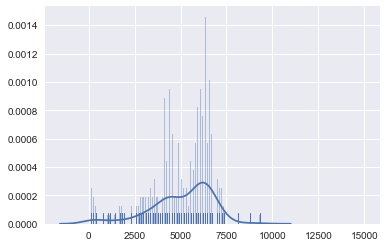

In [25]:
sns.distplot(acdc103_vfa[156, :, 192, 3], bins=256, rug=True, hist_kws={'range': (1, 15000)},\
            kde_kws={'clip': (1, 15000)})